In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# print random numbers using time as random seed
# 現在の時刻をナノ秒で取得してシードとして使用
# with range from 0 to 1
seed = time.time_ns()
random.seed(seed)

# 疑似乱数を生成
random_number = random.random()
print(f"シード: {seed}")
print(f"生成された乱数: {random_number}")

シード: 1726821008085617000
生成された乱数: 0.17725270267222948


# 一様乱数を用いて円周率の４分の１を計算する

In [133]:
n_iter = 10000 # number of iteration
n_init = 0
for i in range(n_iter):
    seed = time.time_ns()
    random.seed(seed)
    x = random.random()  # 0から1の間の乱数
    y = random.random()
    # print('x:', x)
    # print('y:', y)

    if x ** 2 + y ** 2 < 1:
        n_init += 1 # if x**2 + y**2 < 1, count n_init

print('Monte Carlo result:', n_init/n_iter)
print('Analytical result:', np.pi/4)

Monte Carlo result: 0.7946
Analytical result: 0.7853981633974483


# メトロポリス法を用いてガウス分布に従う確率変数の期待値と分散を求める
確率分布を
\begin{align}
P(x) = \frac{e^{-S(x)}}{Z} = \frac{e^{-\frac{x^2}{2}}}{\sqrt{2 \pi}}
\end{align}
とする

In [322]:
n_iter = 10000 # number of iteration
c = 2 # range of random number. run from -c to c

x = 0 # initial value
num_accept = 0 # number of acceptance of Metropolis test
exp_val = 0 # expectation value of x
var = 0 # variance of x

for i in range(n_iter):
    init_action = 0.5 * (x**2) # compute previous action

    # 時刻に依存する乱数を生成
    seed = time.time_ns()
    random.seed(seed)
    rand_num = random.random()
    dx = (rand_num - 0.5) * 2 * c

    new_x = x + dx # propose a new variable
    fin_action = 0.5 * (new_x**2) # compute action based on proposed variable

    ## do Metropolis test
    seed = time.time_ns()
    random.seed(seed)
    metropolis = random.random() # object 'metropolis' is random number runs from 0 to 1 corresponding to r in the text book
    if np.exp(init_action - fin_action) > metropolis: # accept new variable
        x = new_x # update variables
        num_accept += 1
    
    # compute expectation values
    exp_val += x
    var += x**2

# print results
print('acceptance rate:', num_accept/n_iter) # acceptance rate should be within 30% ~ 80%
print('expectation value of x:', exp_val/n_iter)
print('variance of x:', var/n_iter)

acceptance rate: 0.6252
expectation value of x: 0.0031578527680071527
variance of x: 1.0165649982243805


# 既存の確率分布を用いて未知の分配関数を計算する
計算したい分配関数の確率分布：$P(x)=e^{-S(x)}/Z$

既知の確率分布としてガウス分布を用いる：$P_0(x)=e^{-S_0(x)}/Z_0$ w/. $S_0(x)=x^2/2, Z_0 = \sqrt{2\pi}$

このとき, 分配関数の比は計算できて
\begin{align}
\frac{Z}{Z_0} = \frac{1}{Z_0}\int dx e^{-S_0(x)} \cdot e^{S_0(x)-S(x)} = \langle e^{S_0(x)-S(x)} \rangle
\end{align}

In [287]:
def genAction418(x, inf): # generate action in Eq.(4.18)
    if -1 < x and x < 1:
        S = - 0.5 * np.log(1 - x ** 2)
    else: S = inf
    return S

In [428]:
n_iter = 10000 # number of iteration
c = 2 # range of random number. run from -c to c(step size)
inf = 10 ** 64

x = 0 # initial value
num_accept = 0 # number of acceptance of Metropolis test
expS02S = 0 # set variable we want to compute the expectation value

for i in range(n_iter):
    init_action = 0.5 * (x**2) # compute previous action

    # 時刻に依存する乱数を生成
    # generate step size based on random number
    seed = time.time_ns()
    random.seed(seed)
    rand_num = random.random()
    dx = (rand_num - 0.5) * 2 * c

    new_x = x + dx # propose a new variable
    fin_action = 0.5 * (new_x**2) # compute action based on proposed variable

    ## do Metropolis test
    seed = time.time_ns()
    random.seed(seed)
    metropolis = random.random() # object 'metropolis' is random number runs from 0 to 1 corresponding to r in the text book
    if np.exp(init_action - fin_action) > metropolis: # accept new variable
        x = new_x
        num_accept += 1
    
    expS02S += np.exp(0.5 * (x**2) - genAction418(x, inf))

# print results
print('acceptance rate:', num_accept/n_iter) # acceptance rate should be within 30% ~ 80%
print('exp. val. of Z/Z0:', expS02S/n_iter)
print('exp. val. of Z :', expS02S/n_iter * np.sqrt(2 * np.pi))

acceptance rate: 0.6415
exp. val. of Z/Z0: 0.6398939837093107
exp. val. of Z : 1.603976352332027


$Z$の期待値は$\pi/2$に収束するはずで
\begin{align}
\frac{\pi}{2} = 1.57079632679...
\end{align}

# 多変数のガウス積分
今回はまとめて変数を更新する方法で行う

In [107]:
n_iter = 100000 # number of iteration
c_x = 2 # range of random number. run from -c to c(step size)
c_y = 2 # step size of each variable can be choosed indepedently(but take the same size step)

x = 0 # initial value
y = 0
num_accept = 0 # number of acceptance of Metropolis test
exp_val = 0 # set variable we want to compute the expectation value
var = 0
points_list = [] # sampling points

for i in range(n_iter):
    init_action = 0.5 * (x**2 + y**2 + x*y) # compute previous action

    # 時刻に依存する乱数を生成
    # generate step size based on random number
    seed = time.time_ns()
    random.seed(seed)
    rand_num = random.random()
    dx = (rand_num - 0.5) * 2 * c_x
    rand_num = random.random()
    dy = (rand_num - 0.5) * 2 * c_y

    new_x = x + dx # propose a new variable
    new_y = y + dy
    fin_action = 0.5 * (new_x**2 + new_y**2 + new_x*new_y) # compute action based on proposed variable

    ## do Metropolis test
    seed = time.time_ns()
    random.seed(seed)
    metropolis = random.random() # object 'metropolis' is random number runs from 0 to 1 corresponding to r in the text book
    if np.exp(init_action - fin_action) > metropolis: # accept new variable
        x = new_x
        y = new_y
        num_accept += 1
    
    # compute expectation values
    exp_val += x
    var += x**2
    if n_iter % 10 == 0:
        points = (x, y)
        points_list.append(points)

# print results
print('acceptance rate:', num_accept/n_iter) # acceptance rate should be within 30% ~ 80%
print('expectation value of x:', exp_val/n_iter)
print('variance of x:', var/n_iter)

acceptance rate: 0.47681
expectation value of x: 0.008260955290469768
variance of x: 1.3445166899431469


・確率分布をプロット

・10ステップに1回サンプルを取得

・$x=y=0$として熱化を省略

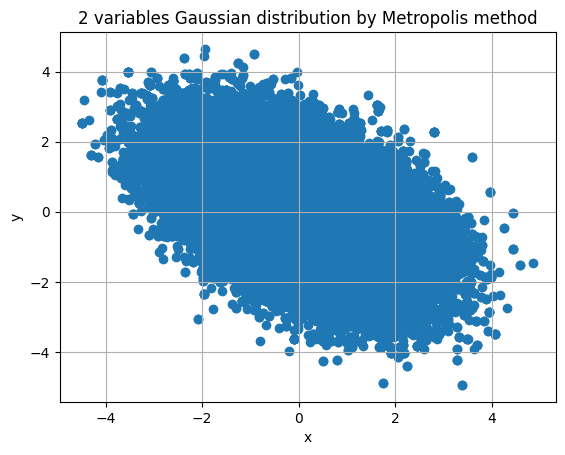

In [108]:
# リストからxとyの値を分けて取得
x_values = [x for x, _ in points_list]
y_values = [y for _, y in points_list]

# プロット
plt.scatter(x_values, y_values)

# グラフのタイトルとラベル
plt.title("2 variables Gaussian distribution by Metropolis method")
plt.xlabel("x")
plt.ylabel("y")

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()

# 一変数のHMC
一変数のガウス積分をHMCで考える

In [5]:
def boxMuller(mu, sigma): # generate a variable following Gaussian distribution
    seed = time.time_ns()
    random.seed(seed)
    p = random.random()
    seed = time.time_ns()
    random.seed(seed)
    q = random.random()
    x = (np.sqrt(-2 * np.log(p))) * np.cos(2 * np.pi * q)
    return sigma * x + mu

In [6]:
def actionGaussian(x):
    S = 0.5 * (x ** 2)
    return S

def Hamiltonian(x, p):
    S = actionGaussian(x)
    H = S + 0.5 * (p ** 2)
    return H

def delHamiltonian(x): # compute derivative of Hamiltonian w.r.t. x
    del_H = x # can compute from action, so if you change the action, you have to change this equation
    return del_H

def molDynamics(x, d_tau, N_tau): # (fictious) time evolution using leap flog method
    p = boxMuller(0, 1) # generate momentum based on Gaussian distribution(mu = 0, sigma = 1)
    H_init = Hamiltonian(x, p)
    # 1st step of leap flog
    x = x + p * 0.5 * d_tau
    # loop part of leap flog
    for _ in range(N_tau):
        p = p - delHamiltonian(x) * d_tau
        x = x + p * d_tau
    # final part of leap flog
    p = p - delHamiltonian(x) * d_tau
    x = x + p * 0.5 * d_tau
    # compute Hamiltonian at final time tau_fin
    H_fin = Hamiltonian(x, p)
    return H_init, H_fin, x

In [7]:
n_iter = 100000 # number of iteration
d_tau = 1
N_tau = 40

x = 0 # initial value
num_accept = 0 # number of acceptance of Metropolis test
exp_val = 0 # set variable we want to compute the expectation value
var = 0

for i in range(n_iter):
    init_action = actionGaussian(x) # compute previous action

    H_init, H_fin, new_x = molDynamics(x, d_tau, N_tau) # time evolution -> compute initisl Hamiltonian and final Hamiltonian, and propose new variables

    ## do Metropolis test
    seed = time.time_ns()
    random.seed(seed)
    metropolis = random.random() # object 'metropolis' is random number runs from 0 to 1 corresponding to r in the text book
    if np.exp(H_init - H_fin) > metropolis: # accept new variable
        x = new_x
        num_accept += 1
    
    # compute expectation values
    exp_val += x
    var += x**2

# print results
print('acceptance rate:', num_accept/n_iter) # acceptance rate should be within 30% ~ 80%
print('expectation value of x:', exp_val/n_iter)
print('variance of x:', var/n_iter)

acceptance rate: 0.92118
expectation value of x: 0.012399865928374788
variance of x: 0.9961962226122104


# 多変数のガウス積分をHMC法でやる

In [8]:
def actionGaussianMulti(x, A):
    S = 0.5 * np.dot(x.T, A @ x)
    return S

def HamiltonianMulti(x, p, A):
    S = actionGaussianMulti(x, A)
    H = S + 0.5 * np.dot(p.T, p)
    return H

def delHamiltonianMulti(x, A): # compute derivative of Hamiltonian w.r.t. x
    del_H = A @ x # can compute from action, so if you change the action, you have to change this equation
    return del_H

def molDynamicsMulti(x, A, d_tau, N_tau, ndim): # (fictious) time evolution using leap flog method
    p = np.zeros((ndim, 1))
    for idim in range(ndim):
        p[idim] = boxMuller(0, 1) # generate each element of momentum based on Gaussian distribution(mu = 0, sigma = 1)
    H_init = HamiltonianMulti(x, p, A)
    # 1st step of leap flog
    x = x + p * 0.5 * d_tau
    # loop part of leap flog
    for _ in range(N_tau):
        p = p - delHamiltonianMulti(x, A) * d_tau
        x = x + p * d_tau
    # final part of leap flog
    p = p - delHamiltonianMulti(x, A) * d_tau
    x = x + p * 0.5 * d_tau
    # compute Hamiltonian at final time tau_fin
    H_fin = HamiltonianMulti(x, p, A)
    return H_init, H_fin, x

In [11]:
n_iter = 10000 # number of iteration
d_tau = 1
N_tau = 40
ndim = 2

x = np.zeros((ndim, 1)) # initial value
A = np.zeros((ndim, ndim))
A[0][1] = A[1][0] = 0.5
A[0][0] = A[1][1] = 1
num_accept = 0 # number of acceptance of Metropolis test
exp_val = 0 # set variable we want to compute the expectation value
var = 0
points_list = [] # sampling points

for i in range(n_iter):
    init_action = actionGaussianMulti(x, A) # compute previous action

    H_init, H_fin, new_x = molDynamicsMulti(x, A, d_tau, N_tau, ndim) # time evolution -> compute initisl Hamiltonian and final Hamiltonian, and propose new variables

    ## do Metropolis test
    seed = time.time_ns()
    random.seed(seed)
    metropolis = random.random() # object 'metropolis' is random number runs from 0 to 1 corresponding to r in the text book
    if np.exp(H_init - H_fin) > metropolis: # accept new variable
        x = new_x
        num_accept += 1
    
    # compute expectation values
    exp_val += x
    var += x**2
    if i % 10 == 0:
        points = (x)
        points_list.append(points)

# print results
print('acceptance rate:', num_accept/n_iter) # acceptance rate should be within 30% ~ 80%
print('expectation value of x:', exp_val/n_iter)
print('variance of x:', var/n_iter)

acceptance rate: 0.8974
expectation value of x: [[0.00795367]
 [0.00049237]]
variance of x: [[1.36031218]
 [1.31607326]]


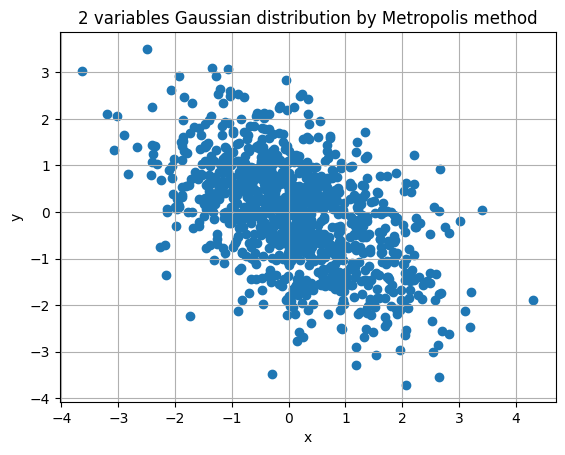

In [12]:
# リストからxとyの値を分けて取得
x_values = [x for x, _ in points_list]
y_values = [y for _, y in points_list]

# プロット
plt.scatter(x_values, y_values)

# グラフのタイトルとラベル
plt.title("2 variables Gaussian distribution by Metropolis method")
plt.xlabel("x")
plt.ylabel("y")

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()